### Importación de Tensorflow

In [ ]:
%tensorflow_version 2.x

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

### Importación de datos |

In [ ]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data( )

11493376/11490434 [==============================] - 0s 0us/step


### verificando los datos de prueba

In [ ]:
y_train.shape

(60000,)

In [ ]:
x_train.shape

(60000, 28, 28)

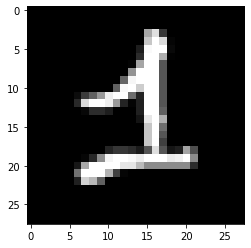

In [ ]:
imagendemo=x_train[24]
plt.imshow(imagendemo,cmap='gray')

In [ ]:
def image_matrix(img):
    print('\n'.join([''.join(['{:4}'.format(int(round(item*255))) for item in row]) 
      for row in img]))

In [ ]:
image_matrix(imagendemo)

   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0423305661014025   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   05023564770555901275   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   073956349564770647702295   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   011475647706477044370 510   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0102041820647706477021675   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   03723064770647706477021675  

Preparando los datos para el entrenamiento
 
La x debe ser convertida a un vector para que pueda ser procesada por la red perceptrón profunda 


In [ ]:
#Metemos la info tal y como queremos.
#En tensorflow 1 ya venía el dato como vector (-,784) aquí en tensorflow2 la shape es (-,28,28) como imagen
#-1 es para mantener el num de datos que se tiene, debemos colocar exactamente el tipo que queremos. Solo acepta ciertos tipos, si se quiere float es 
#float32, si queremos float64 hay que hacer modificaciones al código base
x_train=x_train.reshape(-1,28*28).astype('float32')
x_test=x_test.reshape(-1,28*28).astype('float32')
x_train.shape

(60000, 784)

In [ ]:
x_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

Las salidas y deben se codificadas en one hot

In [ ]:
# onehot encode
#no vienen one hot asi que debemos incorporarlo.
onehot_encoder = OneHotEncoder(sparse=False)
y_train = y_train.reshape(len(y_train), 1)
y_train_onehot = onehot_encoder.fit_transform(y_train)

y_test = y_test.reshape(len(y_test), 1)
y_test_onehot = onehot_encoder.fit_transform(y_test)

y_train_onehot.shape

(60000, 10)

### Declarando la arquitectura

Generando función 

In [ ]:
class DNN_model(object):
  #Se va a correr una sola vez, se ejecuta cuando se genera este objeto/clase
  def __init__(self,
               n_nodes_hl1=500,
               n_nodes_hl2=500,
               n_nodes_hl3=500,
               n_classes=10):
    #Los pesos y los bias son propiedades de este objeto self. 
    #La inicializacion es con numpy arrays. Y debemos generar el tipo de dato. Float32 es el mejor para tensorflow2
    self.h1LW = tf.Variable(np.random.rand(784, n_nodes_hl1),name="hl1weigths",dtype="float32")
    self.h1LB = tf.Variable(np.random.rand(n_nodes_hl1),name="hl1bias",dtype="float32")
    self.h2LW = tf.Variable(np.random.rand(n_nodes_hl1, n_nodes_hl2),name="hl2weigths",dtype="float32")
    self.h2LB = tf.Variable(np.random.rand(n_nodes_hl2),name="hl2bias",dtype="float32")
    self.h3LW = tf.Variable(np.random.rand(n_nodes_hl2, n_nodes_hl3),name="hl3weigths",dtype="float32")
    self.h3LB = tf.Variable(np.random.rand(n_nodes_hl3),name="hl3bias",dtype="float32")
    self.outW = tf.Variable(np.random.rand(n_nodes_hl3, n_classes),name="outweigths",dtype="float32")
    self.outB = tf.Variable(np.random.rand(n_classes),name="outbias",dtype="float32")
    #Generamos etiqueta para poderlas llamar
    self.trainable_variables =[self.h1LW,self.h1LB,self.h2LW,self.h2LB,self.h3LW,self.h3LB,self.outW,self.outB]   
    #Propagación hacia adelante       
  def __call__(self,x): 
      # Declarando la arquitectura

      l1 = tf.add(tf.matmul(x,self.h1LW), self.h1LB)
      l1 = tf.nn.relu(l1)

      l2 = tf.add(tf.matmul(l1,self.h2LW), self.h2LB)
      l2 = tf.nn.relu(l2)

      l3 = tf.add(tf.matmul(l2,self.h3LW), self.h3LB)
      l3 = tf.nn.relu(l3)

      output = tf.matmul(l3,self.outW) + self.outB
      return output
  

In [ ]:
DNN = DNN_model()
DNN(x_train[24:30])

<tf.Tensor: shape=(6, 10), dtype=float32, numpy=
array([[1.69050456e+11, 1.76245277e+11, 1.69957589e+11, 1.67389266e+11,
        1.68017789e+11, 1.69469608e+11, 1.72368495e+11, 1.67053558e+11,
        1.73378568e+11, 1.68369439e+11],
       [3.12698733e+11, 3.26007325e+11, 3.14376126e+11, 3.09625553e+11,
        3.10788391e+11, 3.13474384e+11, 3.18836179e+11, 3.09005353e+11,
        3.20705135e+11, 3.11439426e+11],
       [1.04094220e+11, 1.08524462e+11, 1.04652546e+11, 1.03071121e+11,
        1.03458071e+11, 1.04352244e+11, 1.06137182e+11, 1.02864462e+11,
        1.06759553e+11, 1.03674986e+11],
       [3.53303921e+11, 3.68340337e+11, 3.55199058e+11, 3.49831430e+11,
        3.51145132e+11, 3.54179809e+11, 3.60238121e+11, 3.49130424e+11,
        3.62349462e+11, 3.51880380e+11],
       [3.20471368e+11, 3.34110327e+11, 3.22190541e+11, 3.17321904e+11,
        3.18513316e+11, 3.21266450e+11, 3.26761316e+11, 3.16686238e+11,
        3.28676671e+11, 3.19180472e+11],
       [1.20592417e+11, 1.

Seleccionar un optimizador 

In [ ]:
#optimizador = tf.keras.optimizers.Adam(learning_rate=0.001 )
optimizador = tf.compat.v1.train.AdamOptimizer(learning_rate=0.001)

### Definir las metricas a usar

In [ ]:
train_loss = tf.keras.metrics.Mean(name='train_loss')
train_accuracy = tf.keras.metrics.CategoricalAccuracy(name='train_accuracy')

test_loss = tf.keras.metrics.Mean(name='test_loss')
test_accuracy = tf.keras.metrics.CategoricalAccuracy(name='test_accuracy')

### Calculo de gradientes y ajuste 

In [ ]:
@tf.function
def train_step(model,tdata, labels):
  #Guarda los gradientes en variable tape. Le llaman cinta de gradiente. 
  with tf.GradientTape() as tape:
    predictions = model(tdata)
    #calculo de una funcion de error 
    loss = tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))
   
  gradients = tape.gradient(loss, model.trainable_variables)
  capped_grads_and_vars = [(grad,model.trainable_variables[index]) for index, grad in enumerate(gradients)]
  optimizador.apply_gradients(capped_grads_and_vars)
  train_loss(loss)
  train_accuracy(labels, predictions)

In [ ]:
#train_step(DNN,x_train[24:30], y_train_onehot[24:30])

In [ ]:
@tf.function
def test_step(model,tdata, labels):
  predictions = model(tdata)
  t_loss =  tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels, predictions))

  test_loss(t_loss)
  test_accuracy(labels, predictions)

In [ ]:
#test_step(DNN,x_train[24:30], y_train_onehot[24:30])

## función de entrenamiento  y prueba

In [ ]:

def fitting(model,train_x,train_y,test_x,test_y,EPOCHS,N_batch,batch_size):
  for epoch in range(EPOCHS):
    i=0
    while i+batch_size < len(train_x) or i+batch_size<batch_size*N_batch:
      start = i
      end = i+batch_size
      batch_x = train_x[start:end]
      batch_y = train_y[start:end]
      train_step(model,batch_x,batch_y)
      i+=batch_size

    test_step(model,test_x,test_y)
      
    template = 'Epoch {}, Perdida: {}, Exactitud: {}, Perdida de prueba: {}, Exactitud de prueba: {}'
    print(template.format(epoch+1,
                         train_loss.result(),
                        train_accuracy.result()*100,
                        test_loss.result(),
                        test_accuracy.result()*100))
    #Borramos las variables para que no se acumulen
    train_loss.reset_states()
    train_accuracy.reset_states()
    test_loss.reset_states()
    test_accuracy.reset_states()

  
    

In [ ]:
fitting(DNN,x_train,y_train_onehot,x_test,y_test_onehot,10,600,100)

Epoch 1, Perdida: 300284160.0, Exactitud: 10.105175971984863, Perdida de prueba: 90102752.0, Exactitud de prueba: 10.100000381469727
Epoch 2, Perdida: 66976980.0, Exactitud: 10.707846641540527, Perdida de prueba: 37545652.0, Exactitud de prueba: 10.279999732971191
Epoch 3, Perdida: 9039424.0, Exactitud: 29.560935974121094, Perdida de prueba: 467970.75, Exactitud de prueba: 63.12999725341797
Epoch 4, Perdida: 692607.25, Exactitud: 61.9432373046875, Perdida de prueba: 747027.5, Exactitud de prueba: 66.25999450683594
Epoch 5, Perdida: 342919.90625, Exactitud: 71.00668334960938, Perdida de prueba: 278122.40625, Exactitud de prueba: 72.16999816894531
Epoch 6, Perdida: 211419.984375, Exactitud: 77.0250473022461, Perdida de prueba: 227985.234375, Exactitud de prueba: 76.16000366210938
Epoch 7, Perdida: 152342.953125, Exactitud: 80.98998260498047, Perdida de prueba: 143060.40625, Exactitud de prueba: 80.76000213623047
Epoch 8, Perdida: 101020.09375, Exactitud: 84.13522338867188, Perdida de pru